In [1]:
from keras.models import Model

In [2]:
from keras.layers import *

In [12]:
X=Input(shape=(3,))

In [18]:
hidden1=Dense(128,activation='relu')(X)
hidden2=Dense(64,activation='relu')(hidden1)
output1=Dense(1,activation="linear")(hidden2)
output2=Dense(1,activation='sigmoid')(hidden2)

In [19]:
model=Model(inputs = X, outputs = [output1,output2])


In [20]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 128)                  512       ['input_7[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 64)                   8256      ['dense_8[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 1)                    65        ['dense_9[0][0]']             
                                                                                            

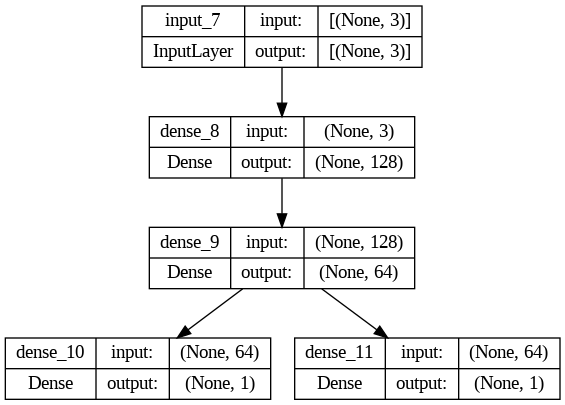

In [21]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [22]:
InputA=Input(shape=(32,))
InputB=Input(shape=(128,))
# create brach for input A
X=Dense(8,activation='relu')(InputA)
X1=Dense(4,activation='relu')(X)
#create for branch B
Y=Dense(8,activation='relu')(InputB)
Y1=Dense(4,activation='relu')(Y)
# CONCATINATING BRACH A AND B
combinedvalue=concatenate([X1,Y1])
Z=Dense(2,activation='relu')(combinedvalue)
z1=Dense(1,activation='linear')(Z)



In [24]:
model=Model(inputs=[InputA,InputB],outputs=z1)

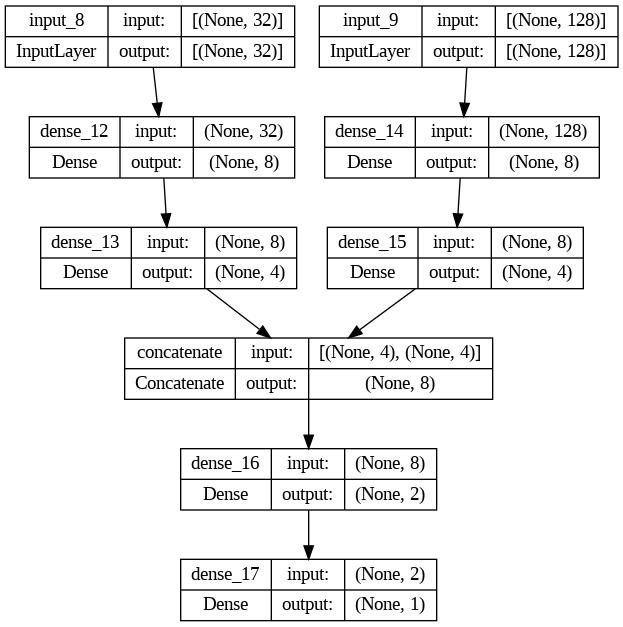

In [25]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [27]:
!kaggle datasets download -d jangedoo/utkface-new

 98% 325M/331M [00:05<00:00, 106MB/s] 
100% 331M/331M [00:05<00:00, 66.8MB/s]


In [28]:
PATH="/content/utkface-new.zip"
import zipfile
zip=zipfile.ZipFile(PATH,"r")
zip.extractall("/content")
zip.close()

In [ ]:
/content/utkface_aligned_cropped/crop_part1/100_1_0_20170110183726390.jpg.chip.jpg

In [29]:
folder_path="/content/utkface_aligned_cropped/crop_part1"

In [32]:
import os
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split("_")[0]))
  gender.append(int(file.split("_")[1]))
  img_path.append(file)

In [33]:
len(age)

9780

In [34]:
len(gender)

9780

In [35]:
import pandas as pd
df=pd.DataFrame({"age":age,"gender":gender,"img":img_path})

In [36]:
df

,age,gender,img
0,2,1,2_1_3_20161220144550221.jpg.chip.jpg
1,75,0,75_0_0_20170111210708463.jpg.chip.jpg
2,8,0,8_0_0_20170110220038315.jpg.chip.jpg
3,53,0,53_0_0_20170104204651866.jpg.chip.jpg
4,62,1,62_1_0_20170110175644800.jpg.chip.jpg
...,...,...,...
9775,4,1,4_1_4_20170103210349522.jpg.chip.jpg
9776,24,1,24_1_2_20170103223948600.jpg.chip.jpg
9777,8,1,8_1_4_20170109201742209.jpg.chip.jpg
9778,2,1,2_1_1_20170109194606626.jpg.chip.jpg


In [37]:
train=df.sample(frac=1,random_state=0).iloc[:9000]
test=df.sample(frac=1,random_state=0).iloc[9000:]

In [38]:
train.shape

(9000, 3)

In [48]:
train

,age,gender,img
3460,66,1,66_1_0_20170105174521629.jpg.chip.jpg
5359,1,0,1_0_0_20161219160713534.jpg.chip.jpg
6067,65,0,65_0_3_20161220221926818.jpg.chip.jpg
7105,1,0,1_0_3_20161220222459155.jpg.chip.jpg
8678,31,1,31_1_0_20170104181343268.jpg.chip.jpg
...,...,...,...
5471,18,1,18_1_0_20170109214813691.jpg.chip.jpg
5217,10,1,10_1_1_20170109202938302.jpg.chip.jpg
7137,42,0,42_0_0_20170105173005714.jpg.chip.jpg
5131,37,0,37_0_0_20170109004257626.jpg.chip.jpg


In [39]:
test.shape

(780, 3)

In [46]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
train_generator=train_datagen.flow_from_dataframe(train,
                                              directory=folder_path,
                                              x_col='img',
                                              y_col=['age','gender'],
                                              target_size=(200,200),
                                              class_mode='multi_output')


test_generator=test_datagen.flow_from_dataframe(test,
                                            directory=folder_path,
                                            x_col='img',
                                            y_col=['age','gender'],
                                            target_size=(200,200),
                                            class_mode='multi_output')

Found 9000 validated image filenames.
Found 780 validated image filenames.


In [54]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [55]:
resnet=ResNet50(include_top=False, input_shape=(200,200,3))

94765736/94765736 [==============================] - 1s 0us/step


In [56]:
resnet.trainable=False

In [57]:
output=resnet.layers[-1].output

In [58]:
flatten=Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [59]:
model=Model(inputs=resnet.input,outputs=[output1,output2])

In [60]:
model.compile(optimizer='adam',loss={"age":"mse","gender":'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'})

In [61]:
model.fit(train_generator,batch_size=32,epochs=2,validation_data=test_generator)

Epoch 1/2
282/282 [==============================] - 126s 394ms/step - loss: 651.2992 - age_loss: 650.2599 - gender_loss: 1.0395 - age_mae: 21.2727 - gender_accuracy: 0.5024 - val_loss: 577.6313 - val_age_loss: 576.9420 - val_gender_loss: 0.6892 - val_age_mae: 19.6850 - val_gender_accuracy: 0.5885
Epoch 2/2
282/282 [==============================] - 109s 385ms/step - loss: 626.7571 - age_loss: 626.0649 - gender_loss: 0.6916 - age_mae: 20.9004 - gender_accuracy: 0.5467 - val_loss: 561.8149 - val_age_loss: 561.1358 - val_gender_loss: 0.6792 - val_age_mae: 20.0134 - val_gender_accuracy: 0.5885
